In [139]:
import pandas as pd
import numpy as np
import seaborn as sns 


In [146]:
data_distp = pd.read_csv("/Users/sylvainestebe/Code/nlp_project/cognitive_distortion_project/data/corpus_kmean.csv")

In [147]:
df = data_distp[["original_label", "all-mpnet-base-v2 k-mean","all-MiniLM-L12-v2 k-mean","All-Distilroberta-v1 k-mean"]]

In [148]:
# Créez une nouvelle colonne 'Numero' en utilisant une fonction de mapping
label_to_numero = {}
current_numero = 0

def assign_numero(label):
    global current_numero
    if label.lower() not in label_to_numero:
        label_to_numero[label.lower()] = current_numero
        current_numero += 1
    return label_to_numero[label.lower()]

df['Numero'] = df['original_label'].apply(assign_numero)

# Affichez le tableau mis à jour
print(df)

              original_label  all-mpnet-base-v2 k-mean  \
0    All-or-nothing thinking                         1   
1    All-or-nothing thinking                         3   
2    All-or-nothing thinking                         8   
3    All-or-nothing thinking                         1   
4    All-or-nothing thinking                        10   
..                       ...                       ...   
917        Should statements                         3   
918        Should statements                        10   
919        Should statements                        10   
920        Should statements                        10   
921        Should statements                         1   

     all-MiniLM-L12-v2 k-mean  All-Distilroberta-v1 k-mean  Numero  
0                          11                            0       0  
1                           6                            5       0  
2                          12                            2       0  
3                          

/var/folders/td/5r8mr8t14cn_c4w5c8ty48lw0000gn/T/ipykernel_45049/439087515.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Numero'] = df['original_label'].apply(assign_numero)


In [149]:
matrice_frequence = pd.crosstab(df["original_label"], df["all-mpnet-base-v2 k-mean"])
matrice_frequence2 = pd.crosstab(df["original_label"], df["all-MiniLM-L12-v2 k-mean"])
matrice_frequence3 = pd.crosstab(df["original_label"], df["All-Distilroberta-v1 k-mean"])



<Axes: xlabel='All-Distilroberta-v1 k-mean', ylabel='original_label'>

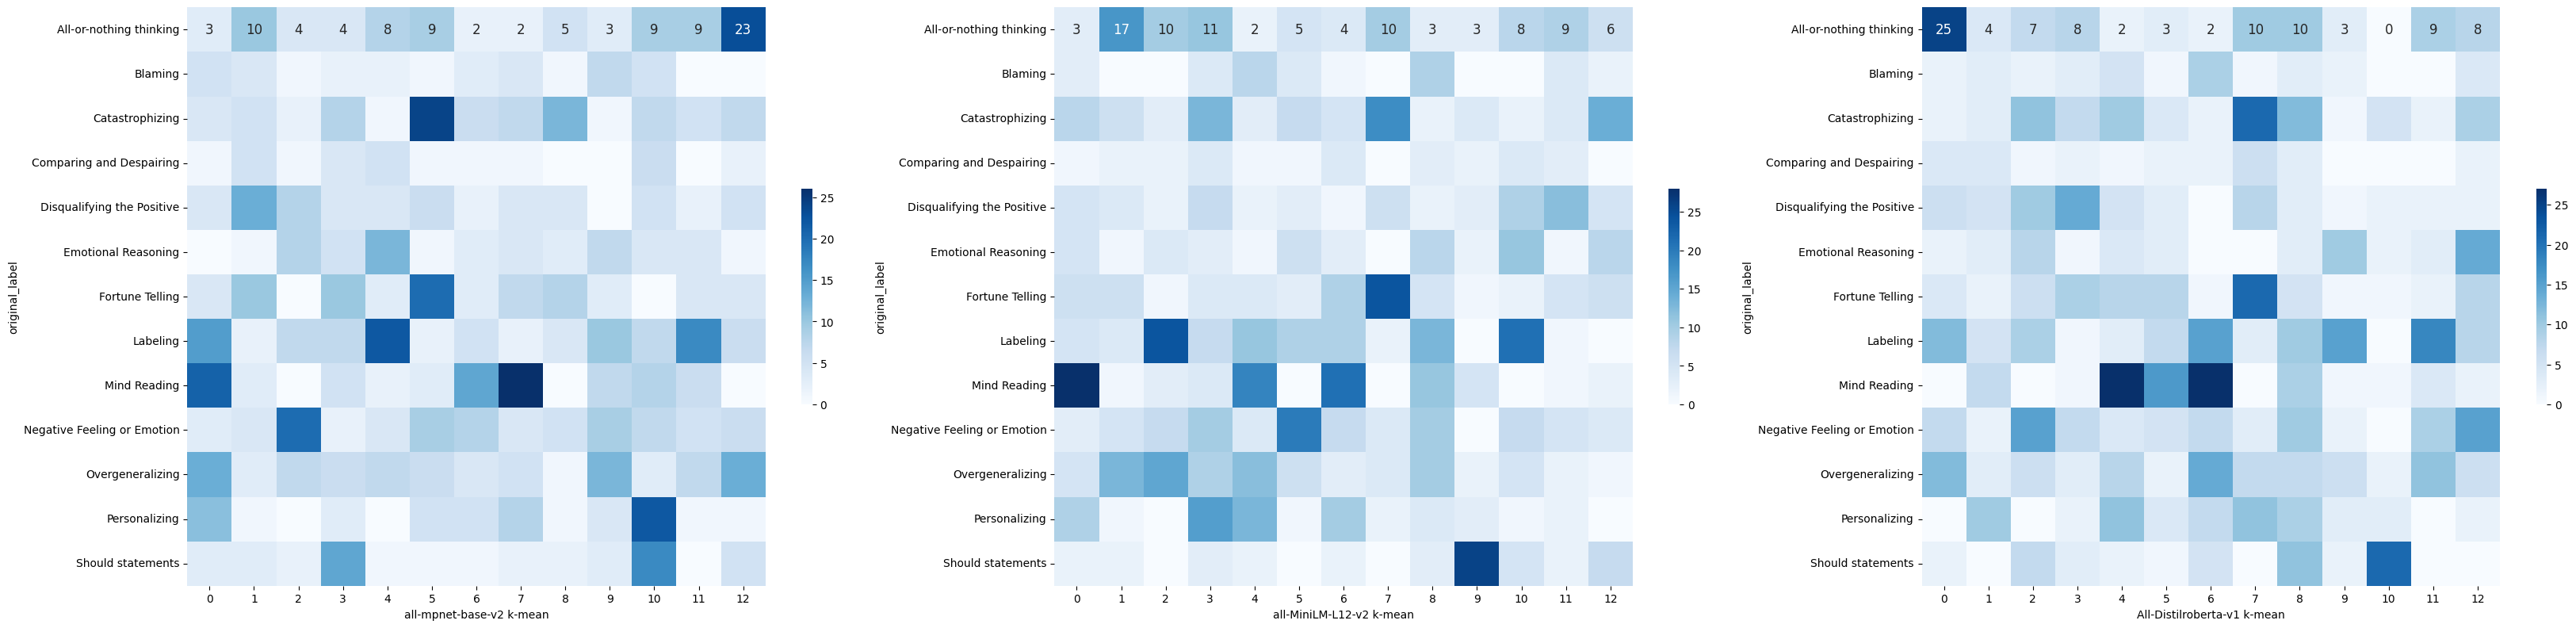

In [150]:
import matplotlib.pyplot as plt
# Here we create a figure instance, and two subplots
fig = plt.figure(figsize = (40,40)) # width x height
ax1 = fig.add_subplot(3, 3, 1) # row, column, position
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)

sns.heatmap(matrice_frequence, ax=ax1, cmap = "Blues", square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12})
sns.heatmap(matrice_frequence2, ax=ax2, cmap = "Blues", square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12})
sns.heatmap(matrice_frequence3, ax=ax3, cmap = "Blues", square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12})
